
# Investigating IKEA Furniture Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Context:
This dataset is a practice of web scraping techniques. The web scraping has been applied on IKEA Saudi Arabian website for the furniture category. The scraped website link: https://www.ikea.com/sa/en/cat/furniture-fu001/

The data requested by 4/20/2020. <br>
dataset: https://www.kaggle.com/ahmedkallam/ikea-sa-furniture-web-scraping

### Content:

* item_id : item id wich can be used later to merge with other IKEA dataframes
* name: the commercial name of items
* category:the furniture category that the item belongs to (Sofas, beds, chairs, Trolleys,…)
* Price: the current price in Saudi Riyals as it is shown in the website by 4/20/2020
* old_price: the price of item in Saudi Riyals before discount
* Short_description: a brief description of the item
* full_Description: a very detailed description of the item. Because it is long, it is dropped from the final dataframe, but it   is available in the code in case it needs to be analyzed.
* designer: The name of the designer who designed the item. this is extracted from the full_description column.
* size: the dimensions of the item including a lot of details.As a lot of dimensions mentioned and they vary from item to item,
  the most common dimensions have been extracted which are: Height, Wideh, and Depth. This column is dropped from the final       dataframe, but it is available in the code in case it is needed.
* width: Width of the item in Centimeter
* height: Height of the item in Centimeter
* depth: Depth of the item in Centimeter
* sellable_Online: if the item is available for online purchasing or in-stores only (Boolean)
* other_colors: if other colors are available for the item, or just one color as displayed in the website (Boolean)
* link: the web link of the item

### Licences:
The scraped website link: https://www.ikea.com/sa/en/cat/furniture-fu001/

## Importing and Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *


%matplotlib inline

In [2]:
df = pd.read_csv('IKEA_SA_Furniture_Web_Scrapings_sss.csv',  index_col=0)

In [3]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


<a id='wrangling'></a>
## Data Wrangling

In [4]:
df.describe()

,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


* max value of price might be an indication of an outlier, a visualization will indicate more.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


* hug amount of null values in the depth height and width features
* old_price is an object, might required more looking

In [6]:
df.nunique()

item_id              2962
name                  607
category               17
price                 979
old_price             365
sellable_online         2
link                 2962
other_colors            2
short_description    1706
designer              381
depth                 114
height                193
width                 263
dtype: int64

* All features have a variance of unique values but category, sellable_online, and other_colors could be useful in the analysis

In [7]:
df.duplicated().sum()

0

* No Duplicates

### Investigating Quantitative values

In [8]:
df['category'].value_counts()

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

* old_price feature needs some modifications:
    1. remove the "SR " string
    2. Change the "No old price" to the same price as now
    3. make it float

In [9]:
df.category.unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [10]:
df.other_colors.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df.sellable_online.unique()

array([ True, False])

### Investigating Old Price

# Add new column for if an Item discounted or not (todo)

In [12]:
df.old_price.unique()[:20]

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310'], dtype=object)

In [13]:
def fix_old_price(df):
    '''modify old_price feature'''
    
    if df['old_price']  == 'No old price':
        return df['price']

    elif df['old_price'][-4:] != 'pack':
        return float(str(df['old_price'])[3:].replace(',',''))
        
    else:
        return np.nan

df['discounted'] = (df['old_price'] != 'No old price').astype(int)   
df['old_price'] = df.apply(fix_old_price, axis=1)
df[['price', 'old_price', 'discounted']].head()

,price,old_price,discounted
0,265.0,265.0,0
1,995.0,995.0,0
2,2095.0,2095.0,0
3,69.0,69.0,0
4,225.0,225.0,0


* here I found 10 values with the ward pack in it, so I decided to drop them (later)
* and I applied the modifications mentioned above

<hr>


### Investigating depth, height, width

In [14]:
df[['depth', 'height', 'width']].isna().head(5)

,depth,height,width
0,True,False,False
1,True,False,False
2,True,True,True
3,False,False,False
4,False,False,False


* looks like the null values can be one of the three or more
* before fixing those values let's plot them
    - Inspiration: https://twitter.com/henrywrover2/status/1323626098924621825

c:\users\amous\appdata\local\programs\python\python38\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_rect : Removed 1640 rows containing missing values.


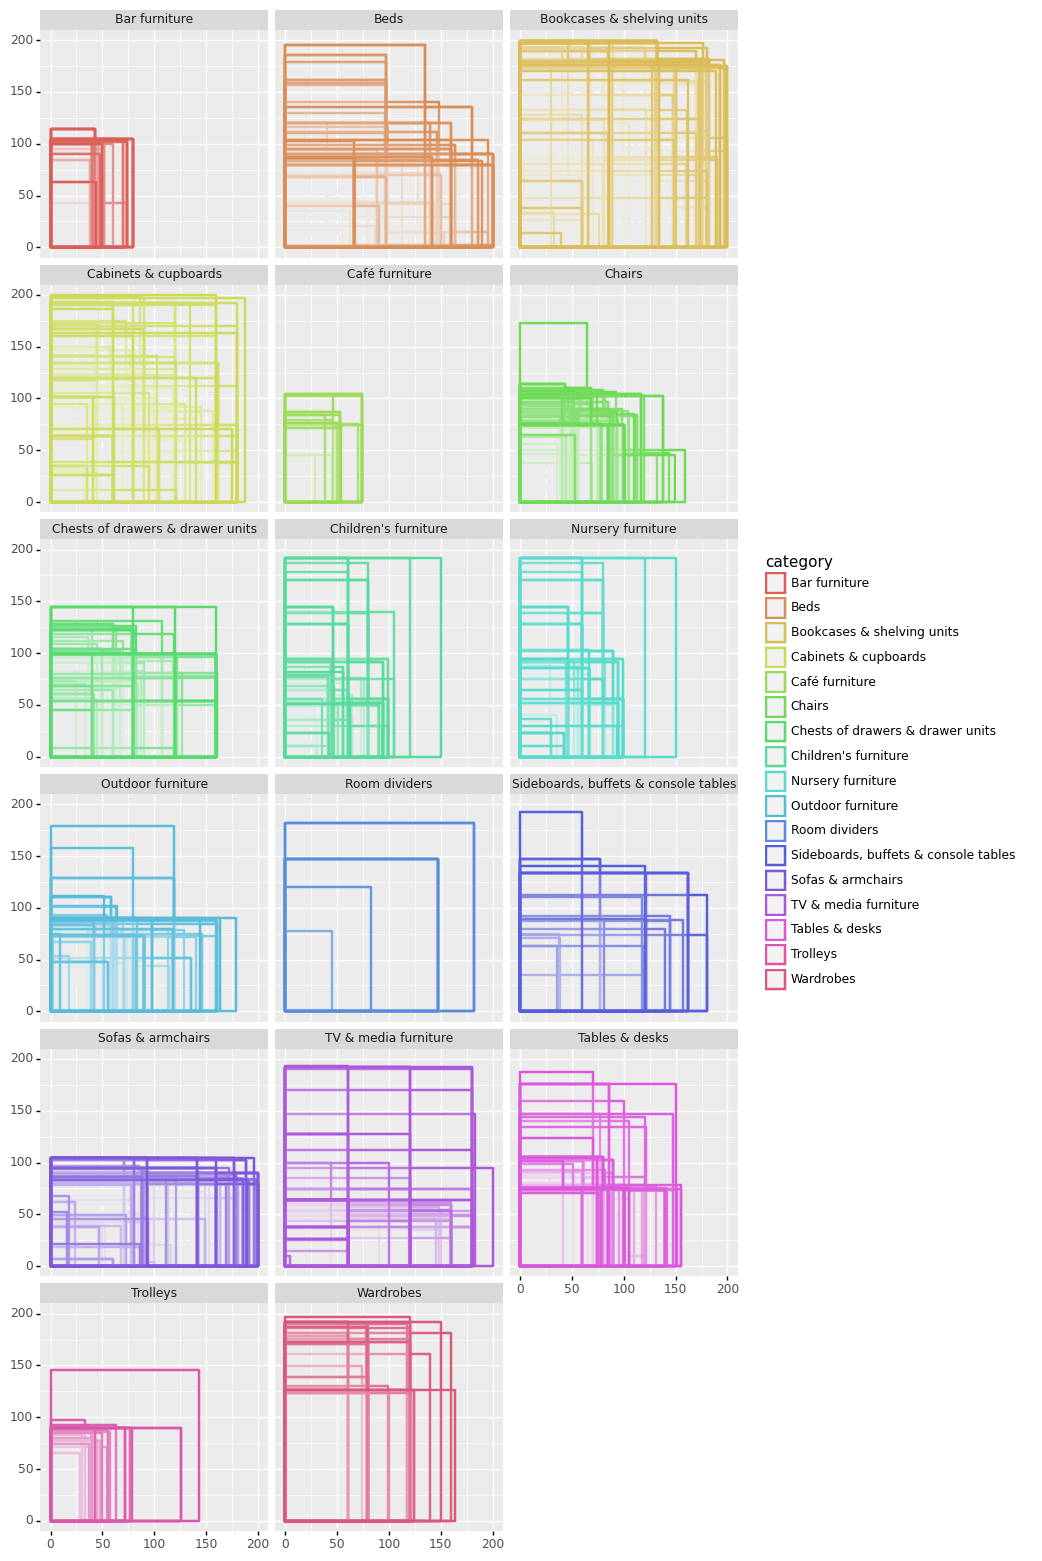

<ggplot: (114872283067)>

In [15]:
ggplot(df, aes(xmin = 0, ymin = 0, xmax = 'width', ymax = 'height', colour = 'category')) + \
geom_rect(alpha = 0.05, fill = "#FFFFFF", size = 1) + \
scale_x_continuous(limits = (0, 200)) + \
scale_y_continuous(limits = (0, 200)) + \
facet_wrap('category', ncol = 3) + \
guides()+ \
coord_fixed() +\
theme(figure_size=(9, 9)) 

* Nice, looks like each category have almost similar shapes
* now let's count the valid (not null) values of each measure

c:\users\amous\appdata\local\programs\python\python38\lib\site-packages\plotnine\layer.py:467: PlotnineWarning: geom_rect : Removed 1640 rows containing missing values.


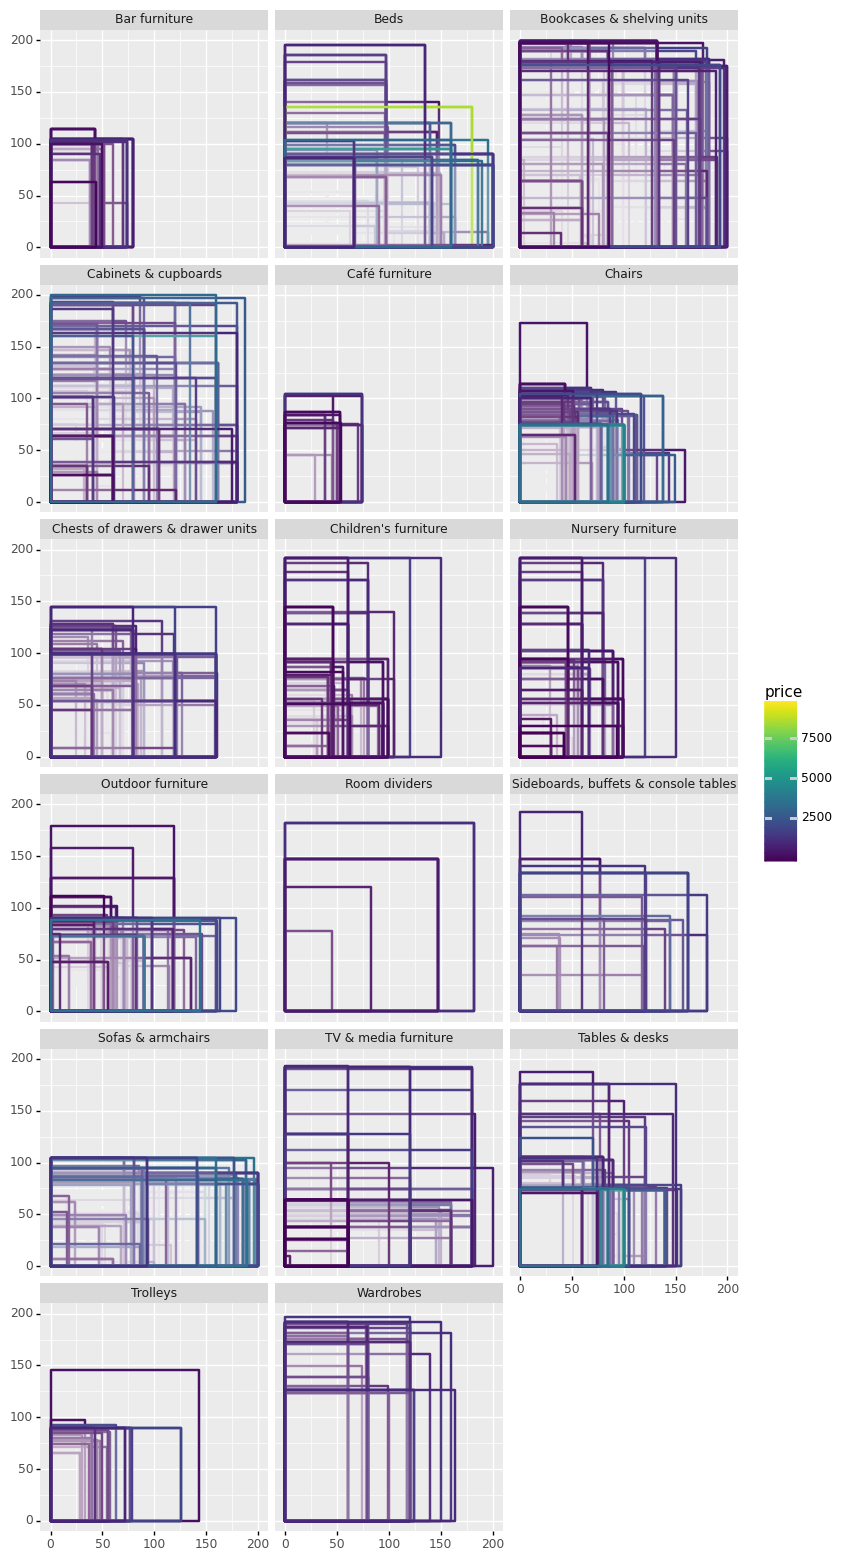

<ggplot: (114872376408)>

In [16]:
ggplot(df, aes(xmin = 0, ymin = 0, xmax = 'width', ymax = 'height', colour = 'price', size='price',  fill = 'sellable_online')) + \
geom_rect(alpha = 0.05, fill = "#FFFFFF", size = 1) + \
scale_x_continuous(limits = (0, 200)) + \
scale_y_continuous(limits = (0, 200)) + \
facet_wrap('category', ncol = 3) + \
guides()+ \
coord_fixed() +\
theme(figure_size=(9, 9)) 

* And here brighter colors (yellowish) means its pricer than others

In [17]:
df.groupby('category')[['width', 'height', 'depth']].apply(lambda x: x.notnull().sum())

,width,height,depth
category,,,
Bar furniture,37,35,27
Beds,185,157,83
Bookcases & shelving units,492,442,453
Cabinets & cupboards,256,230,237
Café furniture,21,22,14
Chairs,389,290,278
Chests of drawers & drawer units,125,123,121
Children's furniture,118,98,94
Nursery furniture,93,84,66


* some patterns found in some categories, like for example most of the Trolleys don't have depth
<br><br>
* now I will fill the null values with its category mean but first I will make 3 new columns indicating if it was available before or not (for other purposes)

In [18]:
df['width_d'] = (df['width'].notnull()).astype(int)
df['height_d'] = (df['height'].notnull()).astype(int)
df['depth_d'] = (df['depth'].notnull()).astype(int)
df[['width', 'height', 'depth', 'width_d', 'height_d', 'depth_d']].head(5)

,width,height,depth,width_d,height_d,depth_d
0,51.0,99.0,NaN,1,1,0
1,80.0,105.0,NaN,1,1,0
2,NaN,NaN,NaN,0,0,0
3,60.0,100.0,50.0,1,1,1
4,74.0,43.0,60.0,1,1,1


In [19]:
df[['width', 'height', 'depth']] = df.groupby(['category'])['width', 'height', 'depth'].transform(lambda x: x.fillna(x.mean()))

<ipython-input-19-3eeee47bf6a4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
df.groupby('category')[['width', 'height', 'depth']].apply(lambda x: x.notnull().sum())

,width,height,depth
category,,,
Bar furniture,47,47,47
Beds,208,208,208
Bookcases & shelving units,548,548,548
Cabinets & cupboards,292,292,292
Café furniture,26,26,26
Chairs,481,481,481
Chests of drawers & drawer units,125,125,125
Children's furniture,124,124,124
Nursery furniture,97,97,97



<hr>

### Dropping unused columns and the 10 weird old_price's raw

In [21]:
cols = ['item_id', 'name','link', 'short_description',
        'designer']
df2 = df.drop(cols, axis=1)
df2.columns

Index(['category', 'price', 'old_price', 'sellable_online', 'other_colors',
       'depth', 'height', 'width', 'discounted', 'width_d', 'height_d',
       'depth_d'],
      dtype='object')

In [22]:
df2.isna().sum()

category            0
price               0
old_price          10
sellable_online     0
other_colors        0
depth               0
height              0
width               0
discounted          0
width_d             0
height_d            0
depth_d             0
dtype: int64

In [23]:
df2.dropna(inplace=True)
df2.isna().sum()

category           0
price              0
old_price          0
sellable_online    0
other_colors       0
depth              0
height             0
width              0
discounted         0
width_d            0
height_d           0
depth_d            0
dtype: int64

In [24]:
df2.head()

,category,price,old_price,sellable_online,other_colors,depth,height,width,discounted,width_d,height_d,depth_d
0,Bar furniture,265.0,265.0,True,No,46.925926,99.000000,51.000000,0,1,1,0
1,Bar furniture,995.0,995.0,False,No,46.925926,105.000000,80.000000,0,1,1,0
2,Bar furniture,2095.0,2095.0,False,No,46.925926,97.571429,52.945946,0,0,0,0
3,Bar furniture,69.0,69.0,True,Yes,50.000000,100.000000,60.000000,0,1,1,1
4,Bar furniture,225.0,225.0,True,No,60.000000,43.000000,74.000000,0,1,1,1


<hr>

<a id='eda'></a>
## Exploratory Data Analysis


* now after we did our cleaning, let's look at the data and look for any interesting insights 


## Univariate Exploration

<AxesSubplot:xlabel='count', ylabel='category'>

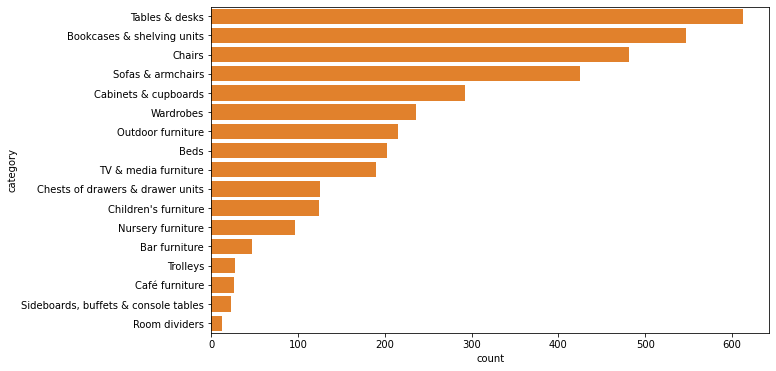

In [25]:
order = df['category'].value_counts().index
color0 = sns.color_palette()[0]
color1 = sns.color_palette()[1]

plt.figure(figsize=[10, 6])


sns.countplot(data=df2, y='category', order=order, color=color1)

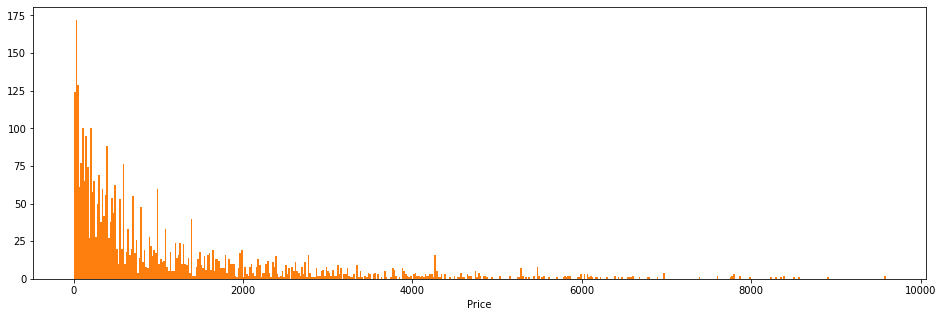

In [26]:
binsize = 500

plt.figure(figsize=[16, 5])
plt.hist(data=df2, x='price',bins=binsize, color=color1)

plt.xlabel('Price');

* price looks kinda log shape, lets zome in a little bit

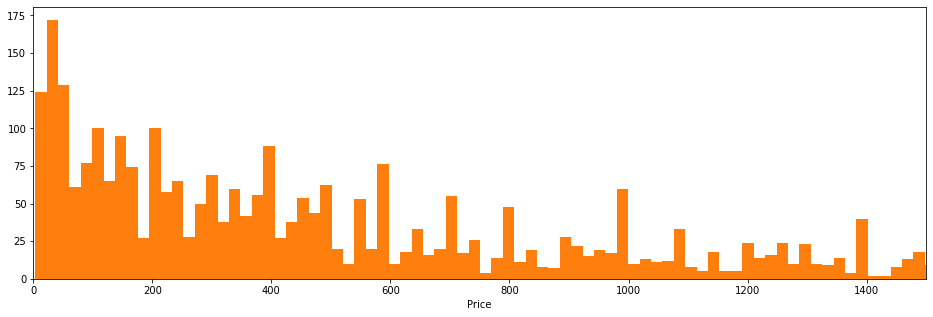

In [27]:
binsize = 500

plt.figure(figsize=[16, 5])
plt.hist(data=df2, x='price',bins=binsize, color=color1)
plt.xlim(0,1500)

plt.xlabel('Price');

* looks like there is a peak in prices every 100 SR and much noticeable at the 1000 SR mark

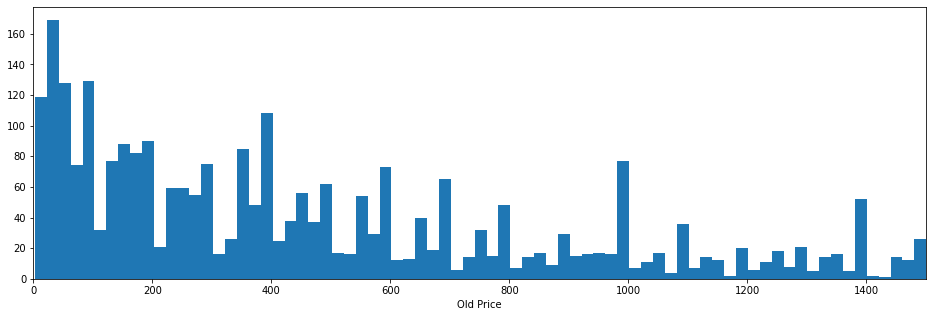

In [28]:
binsize = 500

plt.figure(figsize=[16, 5])
plt.hist(data=df2, x='old_price',bins=binsize, color=color0)
plt.xlim(0,1500)

plt.xlabel('Old Price');

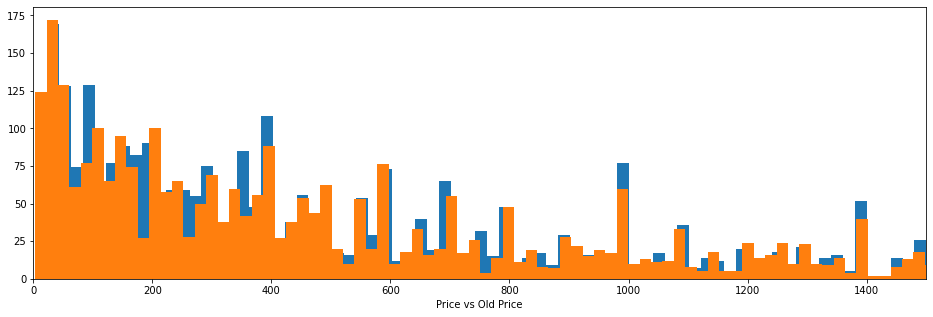

In [29]:
binsize = 500

plt.figure(figsize=[16, 5])
plt.hist(data=df2, x='old_price',bins=binsize)
plt.hist(data=df2, x='price',bins=binsize)

plt.xlim(0,1500)

plt.xlabel('Price vs Old Price');

* old price as expected follow the price shape

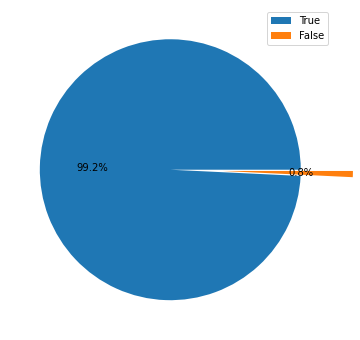

In [30]:
selable_online_count = df2['sellable_online'].value_counts()

plt.figure(figsize=[6, 6])
explode = (0, 0.4)

plt.pie(selable_online_count, explode=explode, autopct='%1.1f%%');
plt.legend(df2['sellable_online'].unique())

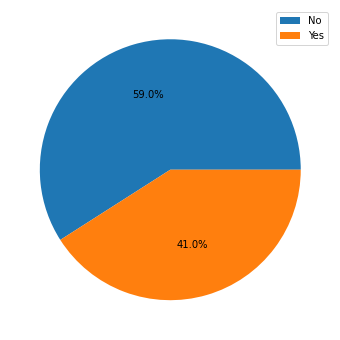

In [31]:
other_colors_count = df2['other_colors'].value_counts()

plt.figure(figsize=[6, 6])
explode = (0, 0.1)

plt.pie(other_colors_count, autopct='%1.1f%%')
plt.legend(df2['other_colors'].unique());

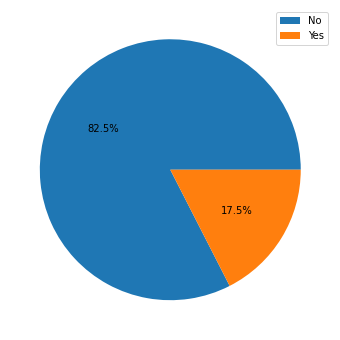

In [32]:
other_colors_count = df2['discounted'].value_counts()

plt.figure(figsize=[6, 6])
explode = (0, 0.1)

plt.pie(other_colors_count, autopct='%1.1f%%')
plt.legend(df2['other_colors'].unique());

* here we see that most items are sellable online (99.2)
* and only 40% of items have other colors

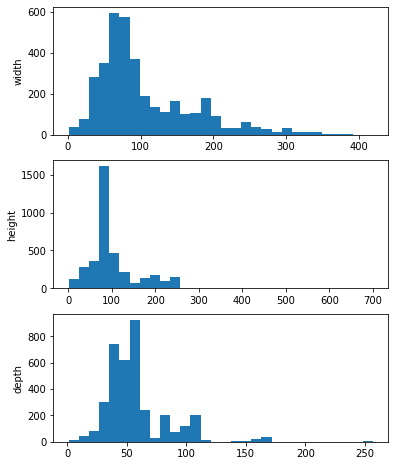

In [33]:
binsize = 30

measures = ['width', 'height', 'depth']

fig, ax = plt.subplots(nrows=3, figsize = [6,8])
for index, measure in enumerate(measures): 
    ax[index].hist(data=df2, x=measure, bins=binsize, color=color0)
    ax[index].set_ylabel(measure);
    ax[index].set_xlabel('');

## Bivariate Exploration

### 1. Price vs Old Price

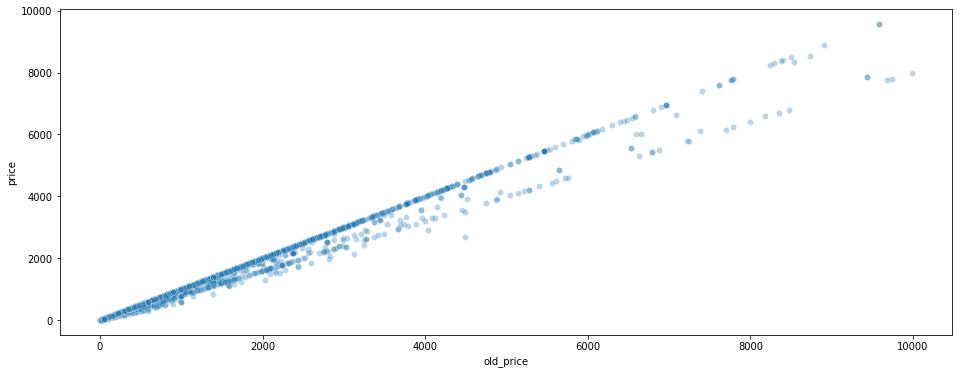

In [34]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=df2, x="old_price", y="price", alpha=0.3);

<AxesSubplot:xlabel='old_price', ylabel='price'>

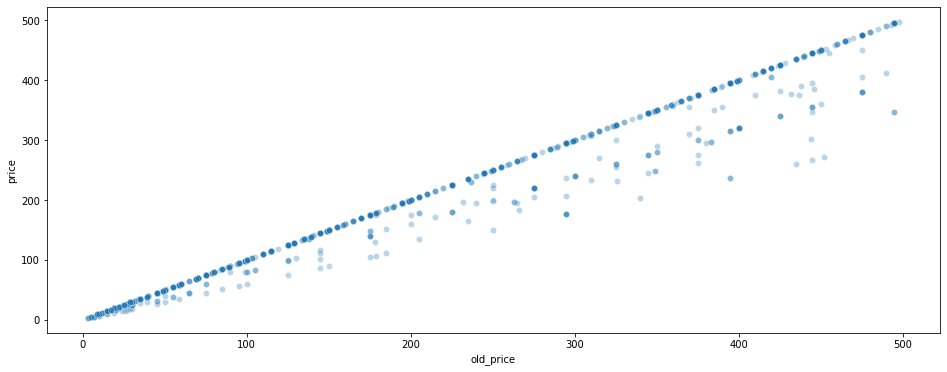

In [35]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=df2.query('old_price < 500'), x="old_price", y="price", alpha=0.3)

* interesting relation between old price and price, here we can see a linear increase in the value of discounts the more the price increases
* maybe we can see more if we look at the relation between prices and the discount amount

<AxesSubplot:xlabel='price', ylabel='discount_amount'>

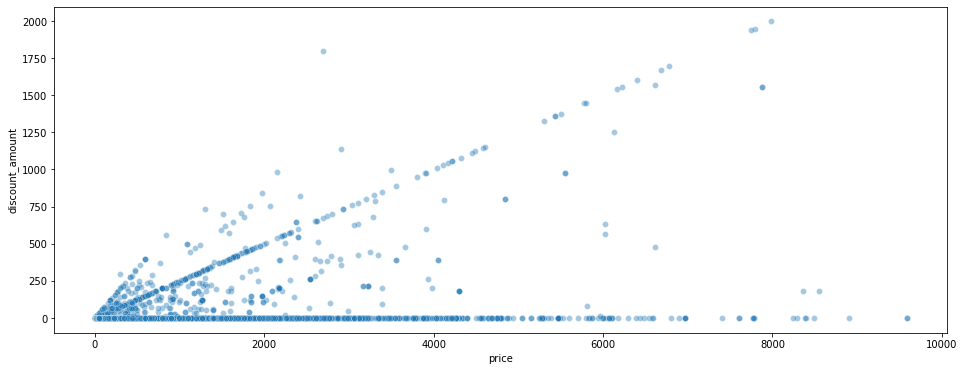

In [36]:
plt.figure(figsize=[16, 6])

df2['discount_amount'] = df2['old_price'] - df2['price']

sns.scatterplot(data=df2, x="price", y="discount_amount", alpha=0.4)

<AxesSubplot:xlabel='price', ylabel='discount_amount'>

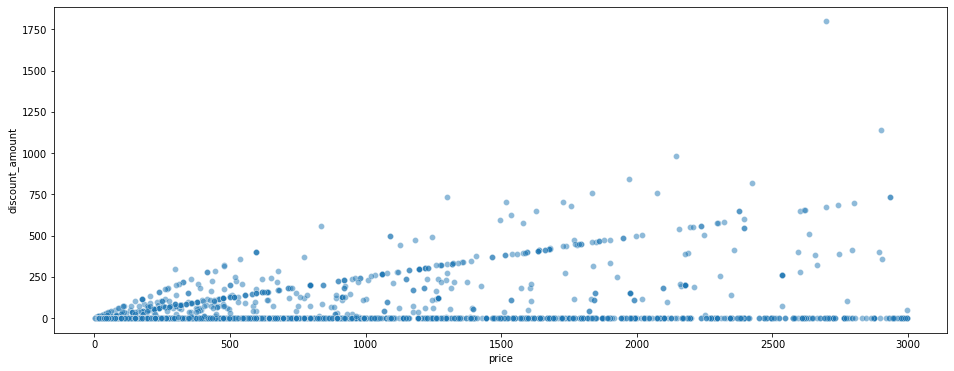

In [37]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=df2.query('price < 3000'), x="price", y="discount_amount", alpha=0.5)

* from this visualization, we found:
    1. most of the items don't have any discount on it
    2. for low prices there is two line relations, one that shares the same line with the high prices and one limited only for low prices
    3. this relation is roughly 25% discount
    4. items from 8k to 10k SR don't have any discount that follows this relation, 200 SR discount only

### 2. Price vs Categorical Variables

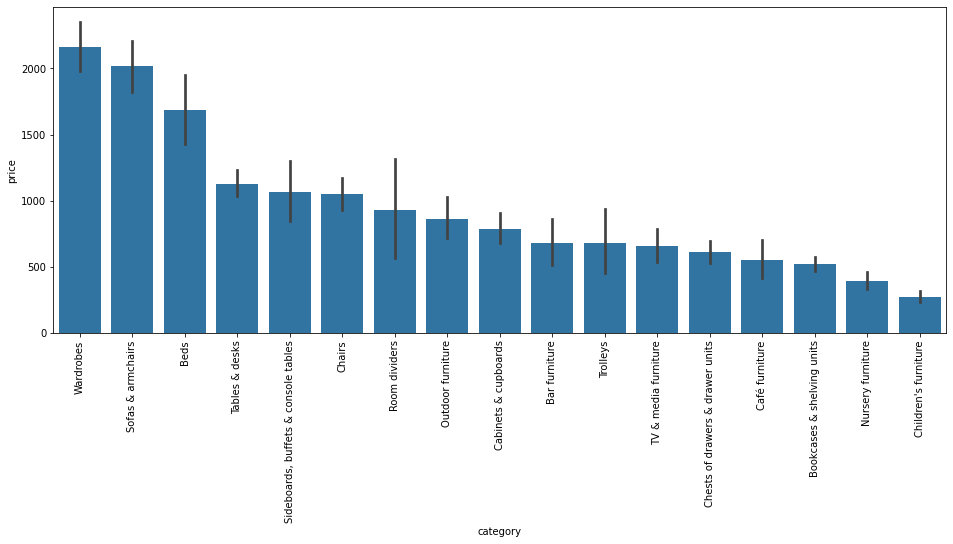

In [38]:
plt.figure(figsize=[16, 6])
result = df.groupby(["category"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)

sns.barplot(data=df2, y='price', x='category', color=color0, order=result['category'])

plt.xticks(rotation=90);

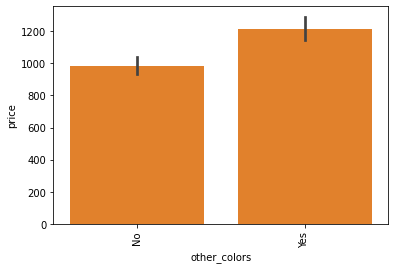

In [39]:
plt.figure(figsize=[6, 4])

sns.barplot(data=df2, y='price', x='other_colors', color=color1)
plt.xticks(rotation=90);

* items with other colors are more expensive

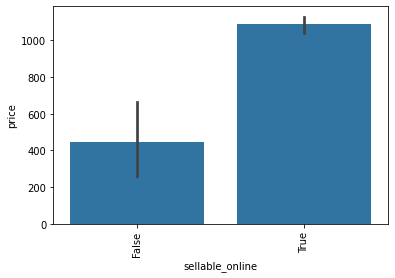

In [40]:
plt.figure(figsize=[6, 4])

sns.barplot(data=df2, y='price', x='sellable_online', color=color0)
plt.xticks(rotation=90);

* items that are sellable online are more expensive than those are local only

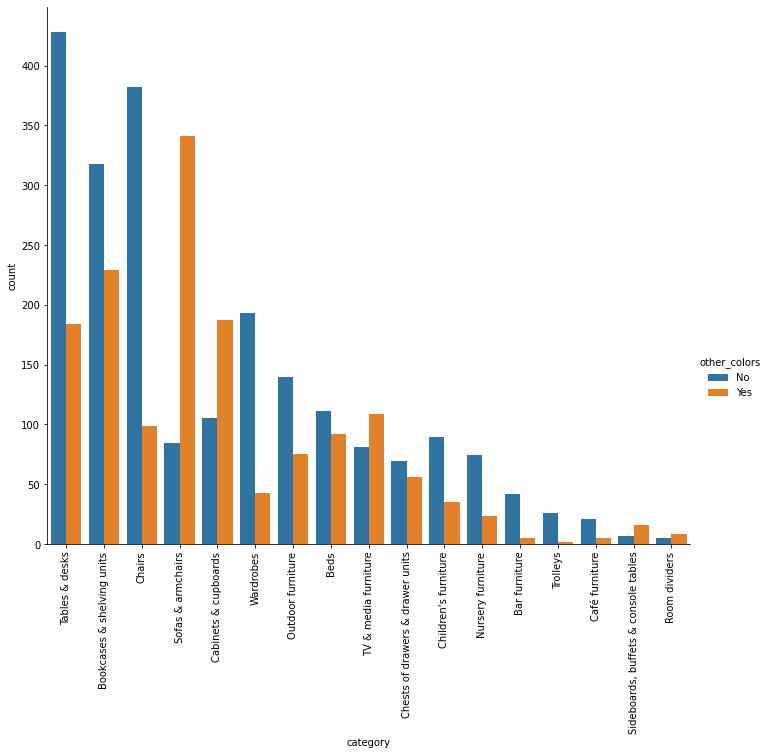

In [41]:
order = df['category'].value_counts().index

sns.catplot(data=df2, x="category", hue='other_colors', kind="count", order=order, height=8, aspect=12/10)

plt.xticks(rotation=90);

### Measures vs Price

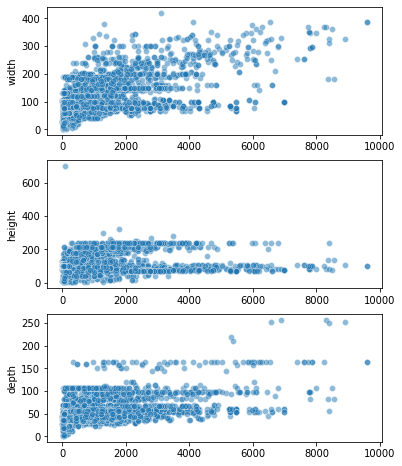

In [42]:
binsize = 30

measures = ['width', 'height', 'depth']

fig, ax = plt.subplots(nrows=3, figsize = [6,8])
for index, measure in enumerate(measures): 
    sns.scatterplot(data=df2, x="price", y=measure, alpha=0.5, ax = ax[index])
    ax[index].set_ylabel(measure);
    ax[index].set_xlabel('');

In [43]:
df2['size'] = (np.where(df2['depth_d'] == 1, df2['depth'],1)) *\
(np.where(df2['width_d'] == 1, df2['width'],1)) *\
(np.where(df2['height_d'] == 1, df2['height'],1))


df2[['size', 'width', 'height', 'depth', 'width_d', 'height_d', 'depth_d']].head(10)

,size,width,height,depth,width_d,height_d,depth_d
0,5049.0,51.000000,99.000000,46.925926,1,1,0
1,8400.0,80.000000,105.000000,46.925926,1,1,0
2,1.0,52.945946,97.571429,46.925926,0,0,0
3,300000.0,60.000000,100.000000,50.000000,1,1,1
4,190920.0,74.000000,43.000000,60.000000,1,1,1
5,163800.0,40.000000,91.000000,45.000000,1,1,1
6,209000.0,50.000000,95.000000,44.000000,1,1,1
7,2500.0,50.000000,97.571429,50.000000,1,0,1
8,209000.0,50.000000,95.000000,44.000000,1,1,1
9,1.0,52.945946,97.571429,46.925926,0,0,0


<AxesSubplot:xlabel='price', ylabel='size'>

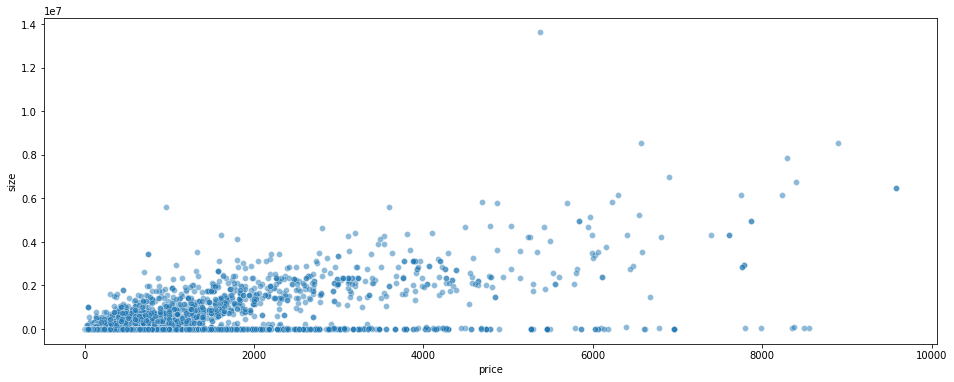

In [44]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=df2, x="price", y="size", alpha=0.5)

<AxesSubplot:xlabel='price', ylabel='size'>

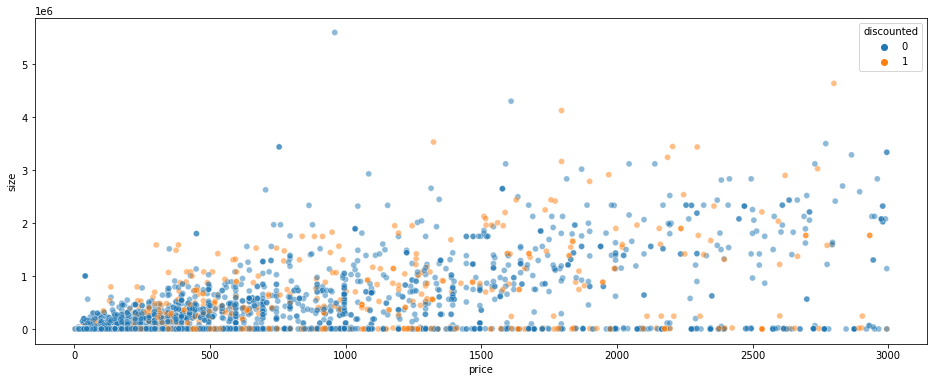

In [45]:
plt.figure(figsize=[16, 6])

sns.scatterplot(data=df2.query('price < 3000'), x="price", y="size", hue='discounted', alpha=0.5)


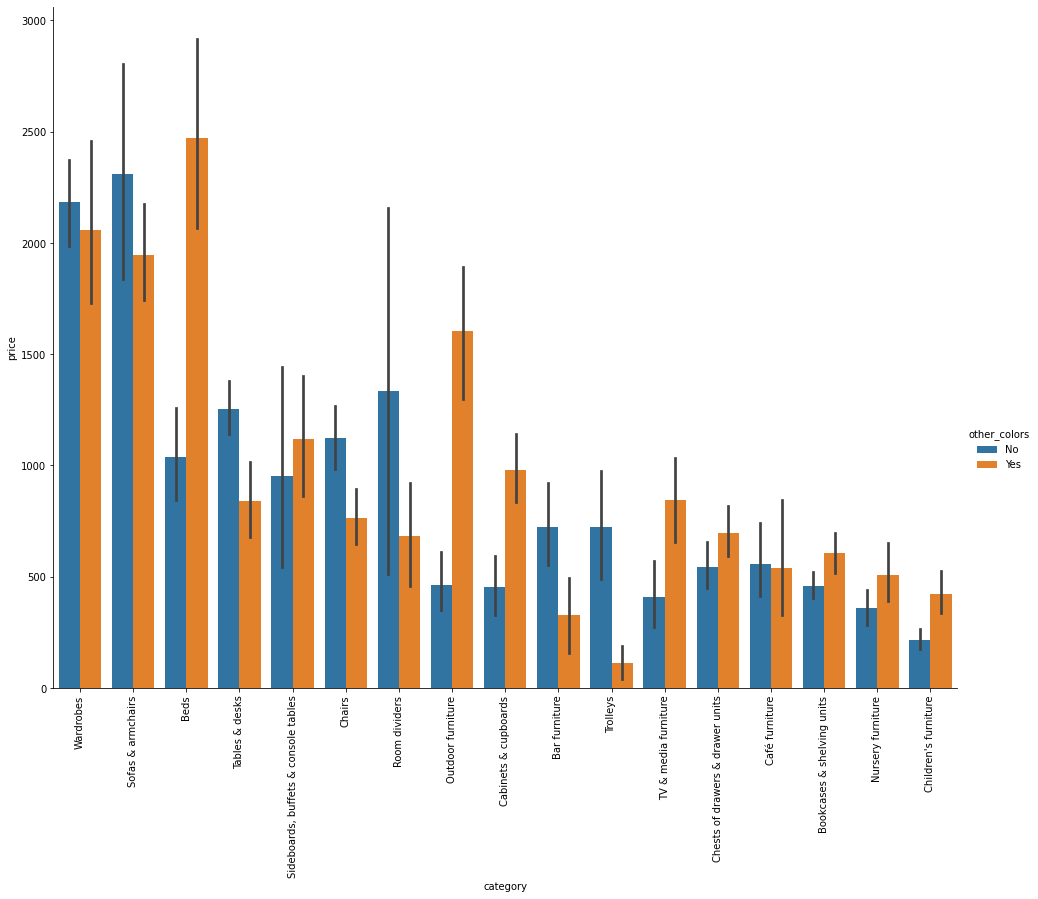

In [46]:
result = df.groupby(["category"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)

sns.catplot(data=df2, x="category", hue='other_colors', kind="bar", y='price', order=result['category'], height=10, aspect=12/9)

plt.xticks(rotation=90);

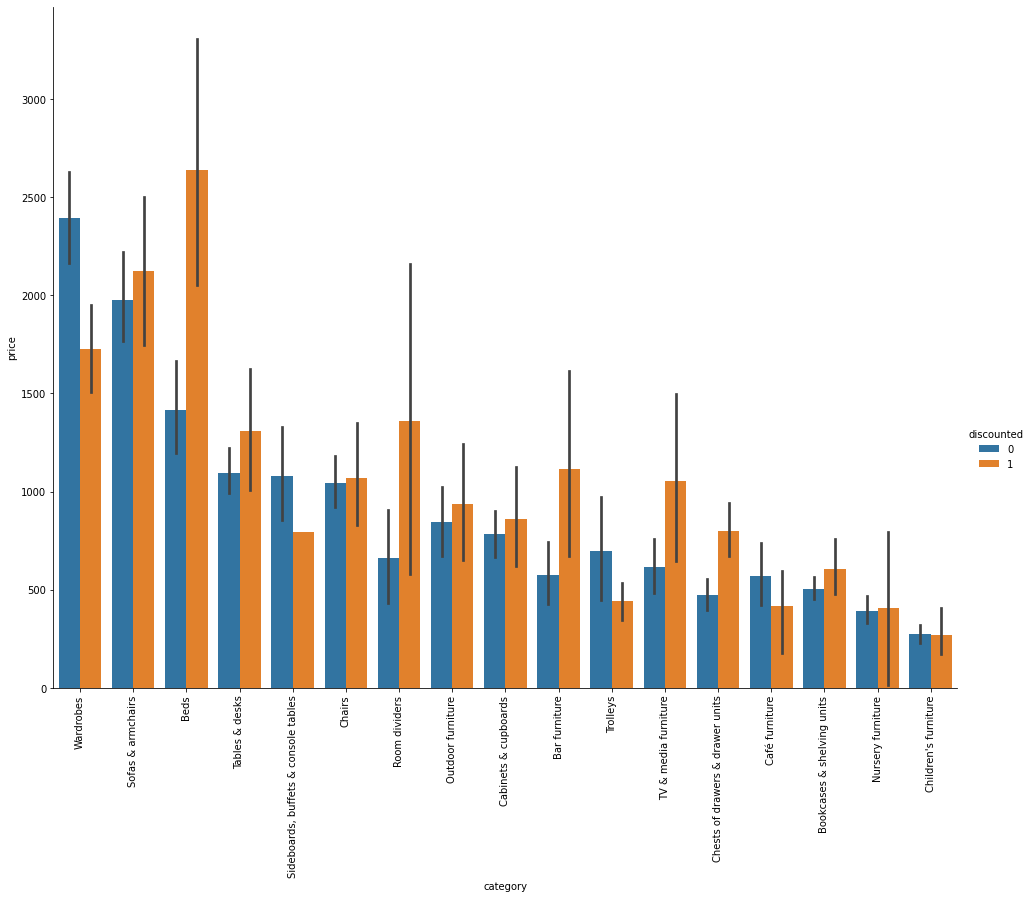

In [47]:
result = df.groupby(["category"])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending=False)

sns.catplot(data=df2, x="category", hue='discounted', kind="bar", y='price', order=result['category'], height=10, aspect=12/9)

plt.xticks(rotation=90);

<AxesSubplot:xlabel='width', ylabel='height'>

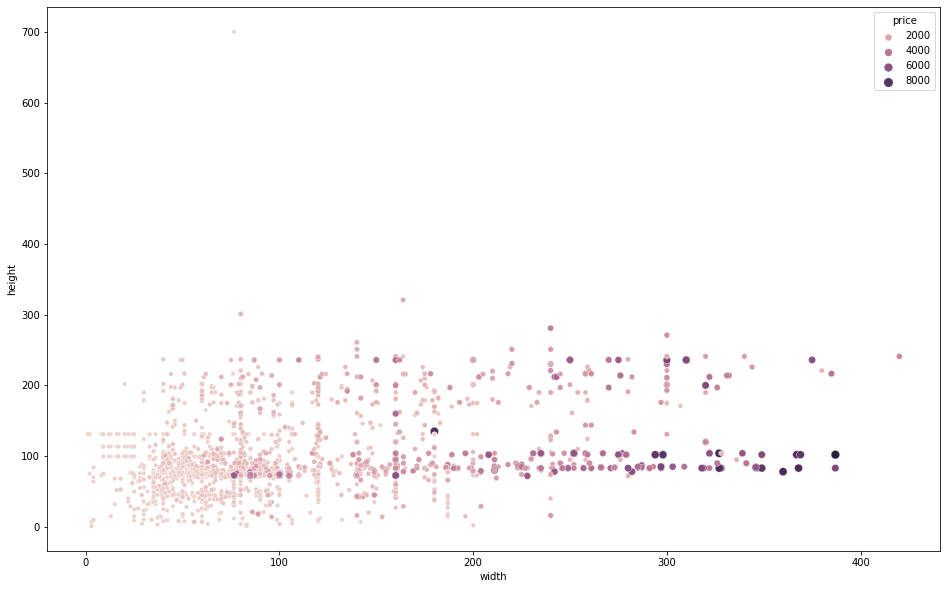

In [48]:
plt.figure(figsize=[16, 10])

sns.scatterplot(data=df2, x="width", y="height", size='price', hue='price')

In [49]:
df2.head()

,category,price,old_price,sellable_online,other_colors,depth,height,width,discounted,width_d,height_d,depth_d,discount_amount,size
0,Bar furniture,265.0,265.0,True,No,46.925926,99.000000,51.000000,0,1,1,0,0.0,5049.0
1,Bar furniture,995.0,995.0,False,No,46.925926,105.000000,80.000000,0,1,1,0,0.0,8400.0
2,Bar furniture,2095.0,2095.0,False,No,46.925926,97.571429,52.945946,0,0,0,0,0.0,1.0
3,Bar furniture,69.0,69.0,True,Yes,50.000000,100.000000,60.000000,0,1,1,1,0.0,300000.0
4,Bar furniture,225.0,225.0,True,No,60.000000,43.000000,74.000000,0,1,1,1,0.0,190920.0


In [50]:
df2.to_csv('clean_IKEA_dataset.csv', index=False)

<a id='conclusions'></a>
## Conclusions

* most items are sellable online (99.2%)
* and only 40% of items have other colors
* most of the items don't have any discount on it
* for low prices there is two line relations, one that shares the same line with the high prices and one limited only for low prices
* this relation is roughly 25% discount
* items from 8k to 10k SR don't have any discount that follows this relation. (only 200 SR discount)
* items that are sellable online are more expensive than those are local only
